In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors as mcolors

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'

In [2]:
t = 'sperm'
df = pd.read_excel(f'../data/mutation_{t}.xlsx', sheet_name='Sheet1').set_index('mutation')


In [5]:
df['mutant'] = df[1] + df[2] + df[3] + df[4] + df[5] + df[6] + df[7] + df[8]
df['wild-type'] = df[0]

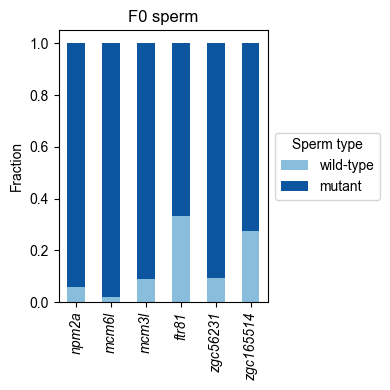

In [74]:
fig, ax = plt.subplots(figsize=(6.4, 4.8), tight_layout=True)

for t in ['sperm'] :
    df_origin = pd.read_excel(f'../data/mutation_{t}.xlsx', sheet_name='Sheet1').set_index('mutation')
    df = pd.DataFrame(index=df_origin.index)
    df['wild-type'] = df_origin[0]
    df['mutant'] = 1 - df_origin[0]
    colormap = plt.cm.get_cmap('Blues', 8)
    colors = [colormap(i) for i in np.linspace(0, 1, 8)][3:9:3]
    df.plot(kind='bar', stacked=True, color=colors, ax=ax, legend=True)
    ax.set_xlabel('')
    ax.set_ylabel('Fraction')
    if t == 'sperm' :
        ax.set_title(f'F0 {t}')
        
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
              labels=['wild-type', 'mutant'],
              title='Sperm type')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontstyle='italic')
    
fig.savefig('../figures_revision2/make1_sperm_WT_mutant_ratio.pdf')    